In [26]:
#you must import 6 libraries!
import numpy as np
import matplotlib.pyplot as plt, seaborn as sns
import Inflow
Inflow.logging.enable_logging()
import ResearchProjects
import pandas as pd
import one

In [27]:
#adaptation is a sublibrary within the ResearchProject
from ResearchProjects import adaptation
#inside adaptation experiment there are different file, we import the "aliases"
from ResearchProjects.adaptation import aliases

In [28]:
connector = one.ONE(mode = 'local')

In [29]:
connector = one.ONE()
connector.set_data_access_mode('remote')
ResearchProjects.core?
ResearchProjects.adaptation.select.cells_labelled
display(ResearchProjects.adaptation.select.cells_labelled)

<function ResearchProjects.adaptation.select.cells_labelled(rois_df, iscell=True, **kwargs)>

Type:        module
String form: <module 'ResearchProjects.core' from 'C:\\Users\\mohay\\anaconda3\\envs\\Analysis\\lib\\site-packages\\ResearchProjects\\core.py'>
File:        c:\users\mohay\anaconda3\envs\analysis\lib\site-packages\researchprojects\core.py
Docstring:   <no docstring>

In [30]:
session = pd.Series({"path" : r"D:\ONE\Adaptation\wm24\2022-08-22\001", 
                     'short_path' : r'wm24\2022-08-22\001', 
                     'subject' : 'wm24',
                     'number' : 1 ,
                      'json': {'channels': ['R', 'G']},
                      'whisker_stims': {'Stimulus right': {'0': 'D1', '1': 'C1'}},
                     'laser_settings': {'laser1': {'power': 100, 'frequency': 1040}}})

In [31]:
session

path                      D:\ONE\Adaptation\wm24\2022-08-22\001
short_path                                  wm24\2022-08-22\001
subject                                                    wm24
number                                                        1
json                                   {'channels': ['R', 'G']}
whisker_stims        {'Stimulus right': {'0': 'D1', '1': 'C1'}}
laser_settings    {'laser1': {'power': 100, 'frequency': 1040}}
dtype: object

In [32]:
adaptation.pipelines.get_trials_df(session)

Trial Start  Stimulus Ref  Stimulus It  Stimulus right  Electr Stim   
trial#                                                                        
0           62894.0        3000.0      65893.0             1.0          0.0  \
1           70443.0        3000.0      73442.0             0.0          0.0   
2           78178.0        3000.0      81177.0             1.0          0.0   
3           86129.0        3000.0      89128.0             0.0          0.0   
4           93858.0        3000.0      96857.0             0.0          0.0   
...             ...           ...          ...             ...          ...   
145       1153883.0        3000.0    1156882.0             1.0          0.0   
146       1161725.0        3000.0    1164724.0             1.0          0.0   
147       1169237.0        3000.0    1172236.0             1.0          0.0   
148       1176793.0        3000.0    1179792.0             1.0          0.0   
149       1184567.0        3000.0    1187566.0             0.0          0.0   

        Curr water duration  Timepoint of valve opening  Data acquisition   
trial#                                                                      
0                     100.0                      3800.0            1250.0  \
1                     100.0                      3800.0            1250.0   
2                     100.0                      3800.0            1250.0   
3                     100.0                      3800.0            1250.0   
4                     100.0                      3800.0            1250.0   
...                     ...                         ...               ...   
145                   100.0                      3800.0            1250.0   
146                   100.0                      3800.0            1250.0   
147                   100.0                      3800.0            1250.0   
148                   100.0                      3800.0            1250.0   
149                   100.0                      3800.0            1250.0   

        Free Choice On  current TDMS_p1 trial  ... target_whisker   
trial#                                         ...                  
0                  0.0                    0.0  ...             C1  \
1                  0.0                    1.0  ...             D1   
2                  0.0                    2.0  ...             C1   
3                  0.0                    3.0  ...             D1   
4                  0.0                    4.0  ...             D1   
...                ...                    ...  ...            ...   
145                0.0                  145.0  ...             C1   
146                0.0                  146.0  ...             C1   
147                0.0                  147.0  ...             C1   
148                0.0                  148.0  ...             C1   
149                0.0                  149.0  ...             D1   

       nontarget_whisker target_amplitude  nontarget_amplitude   
trial#                                                           
0                     D1            10_90                   10  \
1                     C1            10_90                    0   
2                     D1            10_20                   10   
3                     C1            10_20                    0   
4                     C1            10_90                    0   
...                  ...              ...                  ...   
145                   D1            10_90                   10   
146                   D1            10_20                   10   
147                   D1            10_20                    0   
148                   D1            10_20                    0   
149                   C1            10_20                   10   

        complete_amplitude  frequency_change  nontarget_onset   
trial#                                                          
0                 10_90&10              80.0             10.0  \
1                  10_90&0

In [11]:
#sessions = connector.search(subject = "wm24",date_range = "2022-08-09",number = 1, details= True) ###Did not work(OSError: No result exists for trials_df in session wm24_2022_08_09_001)
sessions = connector.search(subject = 'wm24', date_range = "2022-08-22", number = 1,  details = True)
session = sessions.iloc[0]
session

AttributeError: 'tuple' object has no attribute 'iloc'

In [33]:
trials_df = adaptation.pipelines.get_trials_df(session)
rois_df = adaptation.pipelines.get_rois_df(session) # load from file only. Faster but will not generate the data if none exists
trials_roi_df = adaptation.pipelines.get_trials_roi_df(session)

In [34]:
with pd.option_context('display.max_rows', 100, 'display.max_columns', None):
    display(trials_roi_df)

F   
roi# trial#                                                      
0    0       [110.48663330078125, 131.6634063720703, 86.054...  \
     1       [67.9014892578125, 84.18050384521484, 79.32645...   
     2       [68.5937728881836, 60.977806091308594, 68.2375...   
     3       [88.68118286132812, 103.54595947265625, 58.293...   
     4       [67.2108154296875, 93.54744720458984, 47.41284...   
...                                                        ...   
34   145     [79.01573944091797, 149.42901611328125, 109.14...   
     146     [70.81188201904297, 130.8088836669922, 74.7765...   
     147     [67.38467407226562, 104.03815460205078, 66.875...   
     148     [101.09800720214844, 79.50180053710938, 98.070...   
     149     [94.76374053955078, 106.85689544677734, 66.061...   

                                                         F_var   
roi# trial#                                                      
0    0       [0.44800236099089397, 0.7714516639019757, 0.24...  \
     1       [-0.32539554129285003, 0.023858377160785173, -...   
     2       [-0.17911552203251063, 0.18014861315202807, -0...   
     3       [-0.15754997708637508, -0.5217095653778792, -0...   
     4       [-0.2178897487180029, -0.11685176608670593, -0...   
...                                                        ...   
34   145     [0.28543534597878606, 0.14659601694516844, 0.4...   
     146     [-0.09959991718158123, 0.10129027462650247, 0....   
     147     [-0.6525859803693786, -0.3806188309835738, -0....   
     148     [0.08084930191997584, -0.10169227498872888, -0...   
     149     [0.1908002463908141, -0.09864775120552391, -0....   

                                                          Fneu   
roi# trial#                                                      
0    0       [81.11736297607422, 93.11980438232422, 73.6161...  \
     1       [52.151588439941406, 65.11491394042969, 51.899...   
     2       [57.168704986572266, 70.49388885498047, 47.332...   
     3       [57.833740234375, 44.317848205566406, 55.43520...   
     4       [55.2567253112793, 59.00489044189453, 56.47432...   
...                                                        ...   
34   145     [81.04872131347656, 76.43589782714844, 87.0641...   
     146     [68.32051086425781, 74.994873046875, 89.817947...   
     147     [50.0487174987793, 59.089744567871094, 65.0923...   
     148     [74.46154022216797, 68.3974380493164, 61.12307...   
     149     [78.14871978759766, 68.52820587158203, 57.7435...   

                                                      Fneu_var   
roi# trial#                                                      
0    0       [0.44800236099089397, 0.7714516639019757, 0.24...  \
     1       [-0.32539554129285003, 0.023858377160785173, -...   
     2       [-0.17911552203251063, 0.18014861315202807, -0...   
     3       [-0.15754997708637508, -0.5217095653778792, -0...   
     4       [-0.2178897487180029, -0.11685176608670593, -0...   
...                                                        ...   
34   145     [0.28543534597878606, 0.14659601694516844, 0.4...   
     146     [-0.09959991718158123, 0.10129027462650247, 0....   
     147     [-0.6525859803693786, -0.3806188309835738, -0....   
     148     [0.08084930191997584, -0.10169227498872888, -0...   
     149     [0.1908002463908141, -0.09864775120552391, -0....   

                                                          spks target_stim   
roi# trial#                                                                  
0    0       [0.0, 0.0, 0.0, 0.0, 2.942286491394043, 0.0, 0...    C1_10_90  \
     1       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...    D1_10_90   
     2       [0.0, 0.0, 9.140109062194824, 9.33862686157226...    C1_10_20   
     3       [0.0, 0.0, 0.0, 0.0, 0.25519195199012756, 0.0,...    D1_10_20   
     4       [0.0, 0.0, 0.0, 4.29819917678833, 0.0, 0.0, 0....    D1_10_90   
...                                                        ...         ...   
3

In [35]:
trials_roi_df = adaptation.classifiers.extract_features_from_timeseries(trials_roi_df,features_key = "neuronal_features")
trials_roi_df.iloc[0] #check the column neronal feature which was added to the daraframe.
#in_any_barrel means that we are in c1 or in d1.

F                      [110.48663330078125, 131.6634063720703, 86.054...
F_var                  [0.44800236099089397, 0.7714516639019757, 0.24...
Fneu                   [81.11736297607422, 93.11980438232422, 73.6161...
Fneu_var               [0.44800236099089397, 0.7714516639019757, 0.24...
spks                   [0.0, 0.0, 0.0, 0.0, 2.942286491394043, 0.0, 0...
target_stim                                                     C1_10_90
target_amplitude                                                   10_90
frequency_change                                                    80.0
target_stim_info       [{'pulse_freq': '10', 'peak_voltage': '10', 'o...
nontarget_amplitude                                                   10
nontarget_onset                                                     10.0
nontarget_whisker                                                     D1
behavioural_result                                             no_answer
complete_amplitude                                 

In [36]:
adaptation.classifiers.extract_features_from_timeseries?

Signature:
adaptation.classifiers.extract_features_from_timeseries(
    input_object,
    *,
    extract_key='F_var',
    features_key='features',
    timepoints=[-0.2, 0.2, 0.4, 0.6, 0.8, 1, 1.2, 1.4, 1.6, 1.8],
    time_window=0.2,
)
Docstring:
Transform a Pandas DataFrame or Series or a dictionary of values indexed by time values
into a TimelinedArray of features extracted from the specified timepoints.

Args:
    input_object (Union[pd.DataFrame, pd.Series, dict]): The pandas DataFrame or Series or
        a dictionary of values indexed by time values.
    key (str, optional): The key of the column containing the timepoint values.
        If input_object is a dictionary, this argument is ignored. Defaults to "F_var".
    features_key (str, optional): The key in the DataFrame to place the features in.
        Only applicable if input_object is a DataFrame. Defaults to "features".
    timepoints (List[float], optional): A list of timepoints from which to extract features
        (mus

In [37]:
#monir
trials_roi_df.iloc[0]['neuronal_features'] 
#we are not in target barrel and freq is 10 in this roi and 10 to 90 in the target barrel

TimelinedArray([-0.12981764, -0.00398348,  0.03847853,  0.08668479,  0.12417829,
        0.23708764,  0.21619426,  0.14457005,  0.14862556, -0.14819546])

In [38]:

def get_single_classifier_chance(
    training_data, test_data, *, features_key="features", classes_key="target_amplitude"
):
    training_data = training_data.copy()
    randomized_training_data = training_data.sample(frac = 1) #frac 1 == we used loocv method
    training_data.loc[:,classes_key] = list(randomized_training_data.loc[:,classes_key])

    training_set = adaptation.classifiers.get_features_and_classes(
        training_data, features_key=features_key, classes_key=classes_key
    )
    test_set = adaptation.classifiers.get_features_and_classes(
        test_data, features_key=features_key, classes_key=classes_key
    )

    classifier = adaptation.classifiers.LinearSVC()
    classifier.fit(training_set["samples_features"], training_set["samples_classes"])

    score = classifier.score(test_set["samples_features"], test_set["samples_classes"])
    return {
        "score": score,
        "training_trials": training_data.index,
        "test_trials": test_data.index,
        "classifier": classifier,
    }


In [39]:
subset = trials_roi_df.loc[1:1]
for cond, group in subset.groupby(['in_target_barrel','nontarget_amplitude']):
    if cond[0] == True and cond[1] == '0':
        print('codition found')
        break

    #adaptation.classifiers.get_sample_and_training(subset, max_samples = 0.75)

codition found


In [40]:
group #25 rows

F   
roi# trial#                                                      
1    1       [158.18783569335938, 89.54745483398438, 110.91...  \
     3       [65.38990020751953, 97.3988037109375, 78.23871...   
     4       [112.6033706665039, 127.02738189697266, 135.33...   
     10      [91.68379974365234, 73.52933502197266, 133.646...   
     11      [53.50901794433594, 118.64788818359375, 144.23...   
     13      [130.93646240234375, 112.12477111816406, 151.2...   
     15      [83.59259033203125, 76.00702667236328, 108.614...   
     18      [105.2789535522461, 89.87921142578125, 73.5750...   
     22      [114.42371368408203, 90.07608032226562, 109.80...   
     28      [127.884765625, 143.86758422851562, 136.315536...   
     33      [104.84283447265625, 99.85923767089844, 107.31...   
     37      [92.68899536132812, 96.4172592163086, 130.4421...   
     40      [102.0448226928711, 119.07066345214844, 73.027...   
     43      [146.8206329345703, 97.61116790771484, 117.750...   
     48      [101.27511596679688, 150.49525451660156, 118.2...   
     57      [159.9727325439453, 171.37417602539062, 114.04...   
     62      [100.78144836425781, 125.46564483642578, 117.1...   
     68      [94.34769439697266, 127.45576477050781, 153.25...   
     71      [150.43861389160156, 119.72666931152344, 89.88...   
     73      [138.55532836914062, 111.5868148803711, 123.67...   
     74      [103.39415740966797, 125.89250946044922, 151.2...   
     84      [169.5687255859375, 118.83161926269531, 190.79...   
     88      [58.18119430541992, 135.68099975585938, 135.18...   
     97      [138.26419067382812, 231.31321716308594, 117.8...   
     99      [136.2003173828125, 92.34087371826172, 138.626...   
     103     [114.53115844726562, 161.46229553222656, 168.7...   
     107     [112.59676361083984, 151.82598876953125, 110.4...   
     109     [57.468666076660156, 106.03108215332031, 101.8...   
     113     [139.57174682617188, 118.02542114257812, 140.2...   
     114     [104.36060333251953, 93.2950668334961, 91.9490...   
     117     [97.34925842285156, 122.33151245117188, 130.32...   
     118     [97.01407623291016, 108.6667709350586, 127.184...   
     120     [174.27081298828125, 137.41981506347656, 129.1...   
     136     [63.31463623046875, 81.0458755493164, 64.98598...   
     139     [75.8221435546875, 121.13166046142578, 105.691...   
     143     [123.27689361572266, 126.47122192382812, 141.6...   
     144     [92.19116973876953, 141.11790466308594, 114.27...   

                                                         F_var   
roi# trial#                                                      
1    1       [-0.37860951812428595, -0.09118932585200633, 0...  \
     3       [-0.6413238419292778, -0.5933089554122087, -0....   
     4       [-0.07971632302949747, -0.31289708216540224, -...   
     10      [-0.37410173259197227, -0.31330928355173904, -...   
     11      [0.11153642463532662, -0.24504482406416592, -0...   
     13      [-0.0831620511099668, -0.02191384096945937, -0...   
     15      [-0.3045324600908961, -0.34051479348117203, -0...   
     18      [-0.33621665313036564, -0.44401097650316, -0.3...   
     22      [-0.3725754118230143, -0.6310386155947286, -0....   
     28      [-0.03011461074215617, -0.32037417134799967, 0...   
     33      [-0.5550665000435231, -0.2929364099275573, -0....   
     37      [-0.14317988756791897, -0.5433438043911448, -0...   
     40      [-0.2704176389242353, -0.3702954833507052, -0....   
     43      [0.0077019793070132354, -0.15931471948636441, ...   
     48      [-0.28231487281874346, -0.0794134633226591, -0...   
     57      [-0.323936455193329, -0.0911571497981404, -0.0...   
     62      [-0.42390780989672217, -0.5171286881027128, -0...   
     68      [-0.2807659720236702, -0.2975961765445766, -0....   
     71      [-0.56312312965896, -0.39409239642543453, -0.6...   
     73      [-0.2658318578839498, 0.018396691853191403, -0...   
     74      [-0.07452704954347095

In [41]:
np.array(list(trials_roi_df["F_var"][:]))

C:\Users\mohay\AppData\Local\Temp\ipykernel_14492\2905049508.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array(list(trials_roi_df["F_var"][:]))


array([TimelinedArray([ 4.48002361e-01,  7.71451664e-01,  2.45827776e-01,  2.26908979e-01,
               2.41332095e-01,  4.03484942e-01,  6.06293813e-01,  9.41180982e-02,
               3.11227714e-01, -3.74173405e-01, -6.10576214e-02,  3.98238629e-02,
               1.91245177e-01,  2.86264821e-01,  1.88224289e-01, -4.15530141e-01,
              -5.53603723e-02,  2.17175283e-01, -8.44640082e-02,  6.10359842e-02,
               2.86858402e-01,  8.32031584e-02,  9.83081827e-02,  3.63215655e-02,
              -3.84243868e-01, -3.21956872e-01, -1.44826314e-01, -1.42105442e-01,
              -5.92568265e-02, -9.40862423e-02, -4.55996297e-01,  3.73608007e-01,
              -2.35849676e-01, -2.20598544e-02, -1.68495262e-01, -7.75723458e-02,
              -3.64998441e-01, -4.08562861e-01, -3.32404696e-01, -5.66003470e-01,
               1.67879447e-02, -1.70493837e-01, -3.71220240e-01,  2.01086421e-01,
              -5.70370532e-02, -7.35300243e-02,  8.44513328e-02, -2.93730202e-01,
       

In [112]:
# will this work ? bet 1 beer !!! 
#You won


np.array([  item[:150] for item in trials_roi_df["F_var"] ])

array([[ 0.44800236,  0.77145166,  0.24582778, ..., -0.15825711,
        -0.14590299, -0.32151549],
       [-0.32539554,  0.02385838, -0.33238546, ..., -0.07801545,
         0.30293524, -0.06316736],
       [-0.17911552,  0.18014861, -0.44388942, ..., -0.39626362,
        -0.16571452, -0.18205857],
       ...,
       [-0.65258598, -0.38061883, -0.20007785, ..., -0.06044568,
        -0.04015488,  0.00952519],
       [ 0.0808493 , -0.10169227, -0.32065112, ...,  0.04475439,
         0.09135854,  0.20561993],
       [ 0.19080025, -0.09864775, -0.42312811, ...,  0.12892263,
         0.15384755,  0.2107985 ]])

In [42]:
np.median(chance_results)

NameError: name 'chance_results' is not defined

In [43]:
condition_keys = ['in_target_barrel','nontarget_amplitude']
grand_results = []
for roi in rois_df.index : 
    print(roi)
    for condition_values, group in trials_roi_df.loc[roi:roi].groupby(condition_keys):
        if cond[1] == '10' : #we do not want to have a pertubation, so non_target = 0 is what we want
            continue
        conditions = {key : value for key, value in zip(condition_keys , condition_values)}
        
        data = []
        chance = []
        for i in range(500):
            print(i, end= "\r")
            training, test = adaptation.classifiers.get_sample_and_training(
                group, max_samples = 0.5
            )
            score = adaptation.classifiers.get_single_classifier_results(
                training, test, features_key="neuronal_features")


            data.append(score["score"])
            sub_chance = []
            for _ in range(50):
                chance_results = get_single_classifier_chance(training, test, features_key = "neuronal_features")['score']
                sub_chance.append(chance_results)
            chance.append(sub_chance)
        print()
        s = np.median(data)
        ch = np.median(chance)
        cs =  (s - ch) / (1 - ch)
        dico = {"index":roi, "score":s , "score_values":data, "chance_values":chance ,"chance":ch , "corrected" : cs}
        dico.update(conditions)
        
        grand_results.append( dico )
        

0


AttributeError: module 'ResearchProjects.adaptation.classifiers' has no attribute 'get_sample_and_training'

In [44]:
classifier_data = adaptation.classifiers.get_features_and_classes(group,features_key='neuronal_features')
X = classifier_data["samples_features"]
y = classifier_data["samples_classes"]

In [45]:
one_roi_all_trials = trials_roi_df['F_var'][0]
one_roi_all_trials

trial#
0      [0.44800236099089397, 0.7714516639019757, 0.24...
1      [-0.32539554129285003, 0.023858377160785173, -...
2      [-0.17911552203251063, 0.18014861315202807, -0...
3      [-0.15754997708637508, -0.5217095653778792, -0...
4      [-0.2178897487180029, -0.11685176608670593, -0...
                             ...                        
145    [-0.01820918607240805, -0.015286885737646978, ...
146    [-0.07075263048698627, -0.14321302983827025, -...
147    [-0.27854251373066036, 0.2195061242315473, 0.2...
148    [-0.1387883226963254, -0.6539329094909159, -0....
149    [-0.25454560318475217, 0.3316156094474721, -0....
Name: F_var, Length: 150, dtype: object

In [46]:
len(trials_roi_df['F_var'][0][7]) #??

239

In [47]:
type(one_roi_all_trials)

pandas.core.series.Series

In [48]:
one_roi_all_trials

trial#
0      [0.44800236099089397, 0.7714516639019757, 0.24...
1      [-0.32539554129285003, 0.023858377160785173, -...
2      [-0.17911552203251063, 0.18014861315202807, -0...
3      [-0.15754997708637508, -0.5217095653778792, -0...
4      [-0.2178897487180029, -0.11685176608670593, -0...
                             ...                        
145    [-0.01820918607240805, -0.015286885737646978, ...
146    [-0.07075263048698627, -0.14321302983827025, -...
147    [-0.27854251373066036, 0.2195061242315473, 0.2...
148    [-0.1387883226963254, -0.6539329094909159, -0....
149    [-0.25454560318475217, 0.3316156094474721, -0....
Name: F_var, Length: 150, dtype: object

In [49]:

def normalization_one_roi(one_roi_all_trials):
    lenght = []
    one_roi_all_trials
    for trial in one_roi_all_trials:
        t = len(trial)
        lenght.append(t)
    minimum_lenght = min(lenght)
    #print(lenght)

    two_D_trials = []
    for trial in one_roi_all_trials:
        new_trial = trial[:minimum_lenght]
        two_D_trials.append(new_trial)
    two_D_trials = np.array(two_D_trials)
    
    minimum_value = two_D_trials.min()
    maximum_value = two_D_trials.max()
    
    temporary_normalized_trials = []
    for trial in one_roi_all_trials:
        temporary_normalized_trials.append( (trial - minimum_value) / (maximum_value - minimum_value) )
        
    normalized_output = pd.Series(temporary_normalized_trials)
    normalized_output.index = one_roi_all_trials.index 

    return normalized_output

rois_numbers = pd.unique( trials_roi_df.index.get_level_values('roi#') )

new_column = pd.Series()
for roi_nb in rois_numbers :
    one_roi_all_trials = trials_roi_df.loc[roi_nb:roi_nb]['F_var']
    new_column = pd.concat([new_column, normalization_one_roi(one_roi_all_trials)])

trials_roi_df.loc[:,'F_var_norm'] = new_column   #for creating a new column for all the rows


    

In [50]:
def extract_features_from_timeseries(
    input_object,
    *,
    key="F_var",
    features_key="features",
    timepoints=[-0.2, 0 ,0.2, 0.4, 0.6, 0.8, 1, 1.2, 1.4, 1.6],
    time_window = 0.2
):

    if isinstance(input_object, pd.core.frame.DataFrame):
        input_object.loc[:, features_key] = input_object.apply(
            lambda series: extract_features_from_timeseries(
                series,
                key=key,
                timepoints=timepoints,
            ),
            axis=1,
        )
        return input_object
    
    elif isinstance(input_object, (pd.core.series.Series, dict)):
        
        features = []
        for point in timepoints:
            features.append(   input_object[key].isec[point]    )
        return TimelinedArray(features, timeline=timepoints)
    
    else:
        raise NotImplementedError(
            "input_object can obly be a dataframe, a pandas series or a mappable like a dict"
        )


In [51]:
time_window = 0.2
timepoints=[-0.2, 0 ,0.2, 0.4, 0.6, 0.8, 1, 1.2, 1.4, 1.6]
#trial = one_roi_all_trials.iloc[5]
trial = trials_roi_df['F_var_norm'][0][0]

values = []
old_values = []
for point in timepoints :
    
    value = trial.isec[point - (time_window / 2) : point + (time_window / 2)]
    old_value = trial.isec[point]
    #print(value,value.mean())
    
    values.append(value)
    old_values.append(old_value)

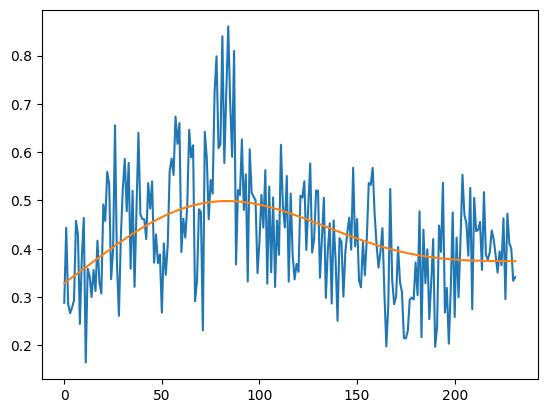

In [52]:
import scipy
trial = trials_roi_df['F_var_norm'][0][1]
b,a = scipy.signal.butter(3,0.01)
filtered_trial = scipy.signal.filtfilt(b,a,trial)
plt.plot(trial)
plt.plot(filtered_trial)


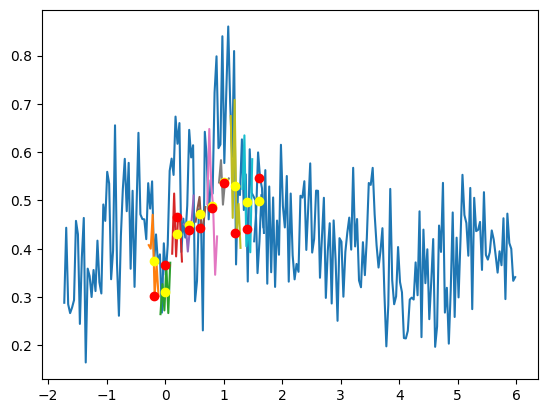

In [53]:
plt.plot(*trial.pack)
[ plt.plot(*item.pack) for item in values ]
plt.plot( timepoints , [ item.mean().item() for item in values ] , 'o', color = "yellow")
plt.plot( timepoints , old_values  , 'ro')

In [54]:
trials_roi_df

F   
roi# trial#                                                      
0    0       [110.48663330078125, 131.6634063720703, 86.054...  \
     1       [67.9014892578125, 84.18050384521484, 79.32645...   
     2       [68.5937728881836, 60.977806091308594, 68.2375...   
     3       [88.68118286132812, 103.54595947265625, 58.293...   
     4       [67.2108154296875, 93.54744720458984, 47.41284...   
...                                                        ...   
34   145     [79.01573944091797, 149.42901611328125, 109.14...   
     146     [70.81188201904297, 130.8088836669922, 74.7765...   
     147     [67.38467407226562, 104.03815460205078, 66.875...   
     148     [101.09800720214844, 79.50180053710938, 98.070...   
     149     [94.76374053955078, 106.85689544677734, 66.061...   

                                                         F_var   
roi# trial#                                                      
0    0       [0.44800236099089397, 0.7714516639019757, 0.24...  \
     1       [-0.32539554129285003, 0.023858377160785173, -...   
     2       [-0.17911552203251063, 0.18014861315202807, -0...   
     3       [-0.15754997708637508, -0.5217095653778792, -0...   
     4       [-0.2178897487180029, -0.11685176608670593, -0...   
...                                                        ...   
34   145     [0.28543534597878606, 0.14659601694516844, 0.4...   
     146     [-0.09959991718158123, 0.10129027462650247, 0....   
     147     [-0.6525859803693786, -0.3806188309835738, -0....   
     148     [0.08084930191997584, -0.10169227498872888, -0...   
     149     [0.1908002463908141, -0.09864775120552391, -0....   

                                                          Fneu   
roi# trial#                                                      
0    0       [81.11736297607422, 93.11980438232422, 73.6161...  \
     1       [52.151588439941406, 65.11491394042969, 51.899...   
     2       [57.168704986572266, 70.49388885498047, 47.332...   
     3       [57.833740234375, 44.317848205566406, 55.43520...   
     4       [55.2567253112793, 59.00489044189453, 56.47432...   
...                                                        ...   
34   145     [81.04872131347656, 76.43589782714844, 87.0641...   
     146     [68.32051086425781, 74.994873046875, 89.817947...   
     147     [50.0487174987793, 59.089744567871094, 65.0923...   
     148     [74.46154022216797, 68.3974380493164, 61.12307...   
     149     [78.14871978759766, 68.52820587158203, 57.7435...   

                                                      Fneu_var   
roi# trial#                                                      
0    0       [0.44800236099089397, 0.7714516639019757, 0.24...  \
     1       [-0.32539554129285003, 0.023858377160785173, -...   
     2       [-0.17911552203251063, 0.18014861315202807, -0...   
     3       [-0.15754997708637508, -0.5217095653778792, -0...   
     4       [-0.2178897487180029, -0.11685176608670593, -0...   
...                                                        ...   
34   145     [0.28543534597878606, 0.14659601694516844, 0.4...   
     146     [-0.09959991718158123, 0.10129027462650247, 0....   
     147     [-0.6525859803693786, -0.3806188309835738, -0....   
     148     [0.08084930191997584, -0.10169227498872888, -0...   
     149     [0.1908002463908141, -0.09864775120552391, -0....   

                                                          spks target_stim   
roi# trial#                                                                  
0    0       [0.0, 0.0, 0.0, 0.0, 2.942286491394043, 0.0, 0...    C1_10_90  \
     1       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...    D1_10_90   
     2       [0.0, 0.0, 9.140109062194824, 9.33862686157226...    C1_10_20   
     3       [0.0, 0.0, 0.0, 0.0, 0.25519195199012756, 0.0,...    D1_10_20   
     4       [0.0, 0.0, 0.0, 4.29819917678833, 0.0, 0.0, 0....    D1_10_90   
...                                                        ...         ...   
3

In [217]:
pd.concat([new_column,new_column])

Series([], dtype: object)

In [202]:
normalization_per_roi(one_roi_all_trials)

trial#
0      [0.6322541180489223, 0.7761630194668011, 0.542...
1      [0.2881543117582828, 0.44354418976450954, 0.28...
2      [0.353237144467088, 0.5130807630741878, 0.2354...
3      [0.36283207589450067, 0.20081037474950209, 0.3...
4      [0.3359857350022453, 0.38093950349419936, 0.35...
                             ...                        
145    [0.4248275106567477, 0.4261276990541367, 0.429...
146    [0.4014499077546569, 0.369210863264242, 0.3628...
147    [0.3090001372520848, 0.5305916871387009, 0.548...
148    [0.37117950174378816, 0.14198163088809942, 0.3...
149    [0.31967683064113844, 0.5804713830005989, 0.22...
Length: 150, dtype: object

In [184]:
print(two_D_trials.min())
print(two_D_trials.max())

-0.9730504837650866
1.2745471264192774


In [185]:
#X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
two_D_trials = (two_D_trials - two_D_trials.min()) / (two_D_trials.max() - two_D_trials.min())

In [189]:
two_D_trials.max()

1.0

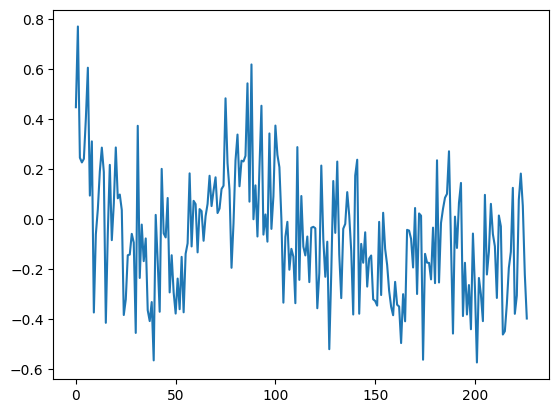

In [57]:
plt.plot(trials_roi_df['F_var'][0][0])

In [56]:
#we created function get_loocv_result which contains the function needed to get the chance and accuracy and then 
#the function for getting the accuracy correction
#In scikit-learn, normalization can be done using the StandardScaler or 
#MinMaxScaler classes from the sklearn.preprocessing module.
from sklearn.datasets import make_blobs
from sklearn.model_selection import LeaveOneOut
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from numpy import random
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
#X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
#X_scaled = X_std * (max - min) + min
# create dataset
#X, y = make_blobs(n_samples=100, random_state=1)
# create loocv procedure
def accuracy_correction(accuracy, chance):
    if isinstance(chance,(list,np.ndarray)):
        chance = np.median(chance)
    corrected_accuracy =  (accuracy - chance) / (1 - chance)
    return corrected_accuracy



def get_loocv_classifier_accuracy(training_data, *, features_key = 'features', classes_key = 'target_amplitude'):
    classifier_data = adaptation.classifiers.get_features_and_classes(training_data,features_key=features_key,classes_key=classes_key)
    X = classifier_data["samples_features"]
    y = classifier_data["samples_classes"]
    cv = LeaveOneOut()
    # enumerate splits
    y_true, y_pred = list(), list()
    for train_ix, test_ix in cv.split(X):
        # split data
        X_train, X_test = X[train_ix, :], X[test_ix, :]
        y_train, y_test = y[train_ix], y[test_ix]
        # fit model


        model = LinearSVC()
        #model = RandomForestClassifier(random_state=1)
        model.fit(X_train, y_train)
        # evaluate model
        yhat = model.predict(X_test)
        # store

        y_true.append(y_test[0])
        y_pred.append(yhat[0])
    # calculate accuracy
    acc = accuracy_score(y_true, y_pred)
    #print('Accuracy: %.3f' % acc)
    return acc


def get_loocv_classifier_chance(training_data,*, features_key = 'features', classes_key = 'target_amplitude',number_of_estimator =200):
    classifier_data = adaptation.classifiers.get_features_and_classes(training_data,features_key=features_key,classes_key=classes_key)
    X = classifier_data["samples_features"]
    y = classifier_data["samples_classes"]
    cv = LeaveOneOut()
    chance_accumulation = []

    for i in range(number_of_estimator):
        print(i, end = '\r')
        random.shuffle(y)

        cv = LeaveOneOut()
        # enumerate splits
        y_true, y_pred = list(), list()
        for train_ix, test_ix in cv.split(X):
            # split data
            X_train, X_test = X[train_ix, :], X[test_ix, :]
            y_train, y_test = y[train_ix], y[test_ix]
            # fit model
            model = LinearSVC()
            #model = RandomForestClassifier(random_state=1)
            model.fit(X_train, y_train)
            # evaluate model
            yhat = model.predict(X_test)
            # store

            y_true.append(y_test[0])
            y_pred.append(yhat[0])

        # calculate accuracy
        acc = accuracy_score(y_true, y_pred)
        chance_accumulation.append(acc)
    #print('Chance level: %.3f' % np.median(chance_accumulation))
    return chance_accumulation


def get_loocv_results(training_data, *, features_key = 'features', classes_key = 'target_amplitude', number_of_estimator = 201):
    accuracy = get_loocv_classifier_accuracy(training_data, features_key = features_key, classes_key = classes_key)
    StandardScaler(accuracy)
    chance = get_loocv_classifier_chance(training_data, features_key = features_key, classes_key = classes_key, number_of_estimator = number_of_estimator)
    StandardScaler(chance)
    acc = accuracy_correction(accuracy, chance)
    return acc

In [58]:
get_loocv_results(group,features_key='neuronal_features')

TypeError: __init__() takes 1 positional argument but 2 were given

('10_20',)
('10_90',)


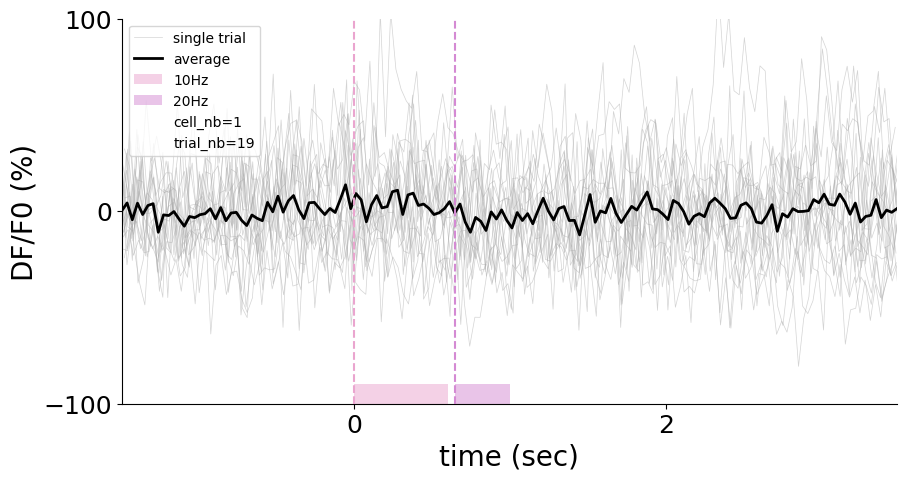

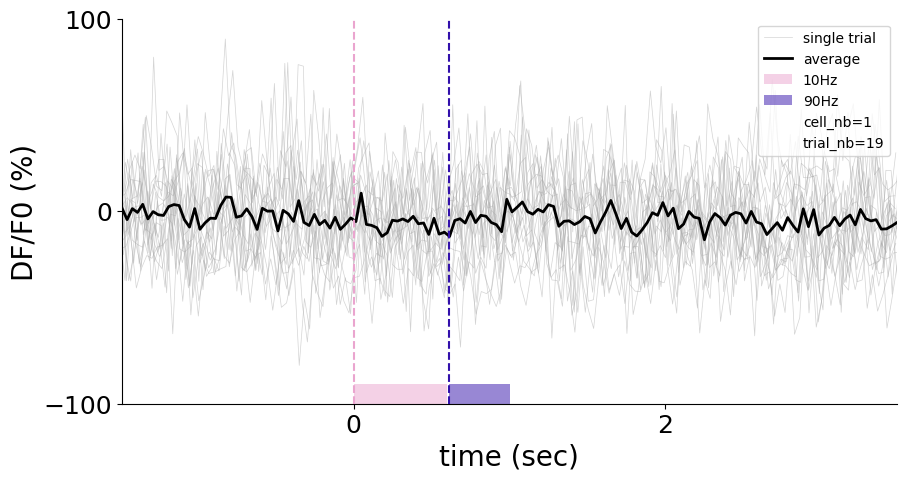

In [59]:
for cond, sub_group in group.groupby(['target_amplitude']):
    print(cond)
    adaptation.plots.show_traces_averages(sub_group)

C:\Users\mohay\anaconda3\envs\Analysis\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\mohay\anaconda3\envs\Analysis\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


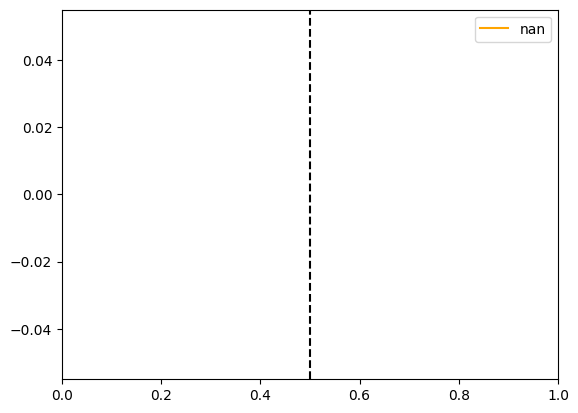

In [60]:
plt.hist(data,bins=20)
plt.xlim(0,1)
plt.axvline(0.5,ls = '--', color = "black")
plt.axvline(np.median(data),ls = '-', color = "orange", label = str(np.median(data)))
plt.legend()

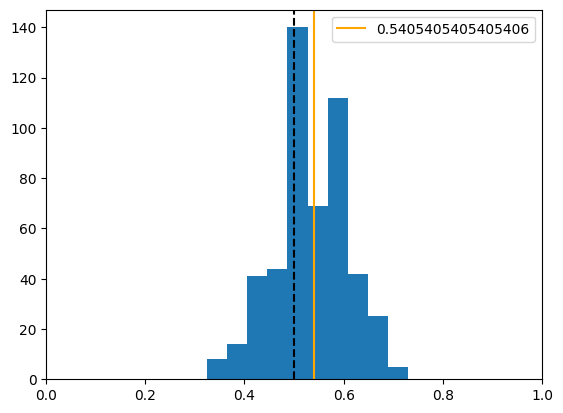

In [335]:
plt.hist(data,bins=10)
plt.xlim(0,1)
plt.axvline(0.5,ls = '--', color = "black")
plt.axvline(np.median(data),ls = '-', color = "orange", label = str(np.median(data)))
plt.legend()

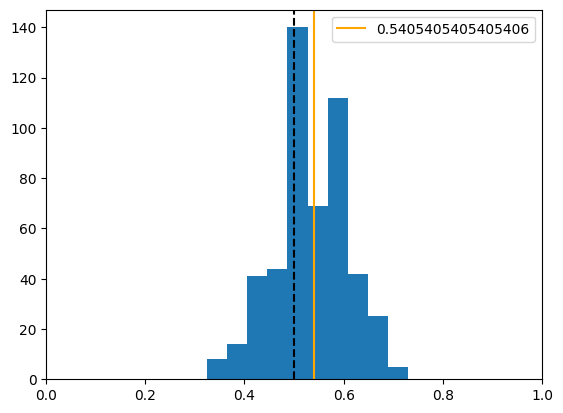

In [336]:
plt.hist(data,bins=10)
plt.xlim(0,1)
plt.axvline(0.5,ls = '--', color = "black")
plt.axvline(np.median(data),ls = '-', color = "orange", label = str(np.median(data)))
plt.legend()

In [340]:
chance


[[0.4594594594594595,
  0.43243243243243246,
  0.35135135135135137,
  0.6216216216216216,
  0.6756756756756757,
  0.5135135135135135,
  0.5135135135135135,
  0.5675675675675675,
  0.5675675675675675,
  0.5405405405405406,
  0.5135135135135135,
  0.6486486486486487,
  0.4594594594594595,
  0.4594594594594595,
  0.5405405405405406,
  0.5675675675675675,
  0.4864864864864865,
  0.4864864864864865,
  0.5135135135135135,
  0.5945945945945946,
  0.5675675675675675,
  0.4594594594594595,
  0.4864864864864865,
  0.4864864864864865,
  0.5675675675675675,
  0.4864864864864865,
  0.4864864864864865,
  0.7027027027027027,
  0.5135135135135135,
  0.43243243243243246,
  0.40540540540540543,
  0.5945945945945946,
  0.6486486486486487,
  0.5405405405405406,
  0.35135135135135137,
  0.5675675675675675,
  0.3783783783783784,
  0.5945945945945946,
  0.4594594594594595,
  0.32432432432432434,
  0.4594594594594595,
  0.3783783783783784,
  0.4594594594594595,
  0.4864864864864865,
  0.5135135135135135,
  0.

(0.0, 1.0)

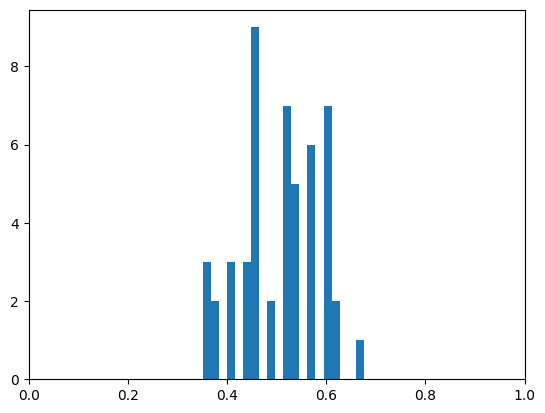

In [337]:
plt.hist(np.array(chance)[6,:],bins=20)
plt.xlim(0,1)


In [342]:
np.median(chance)

0.4864864864864865

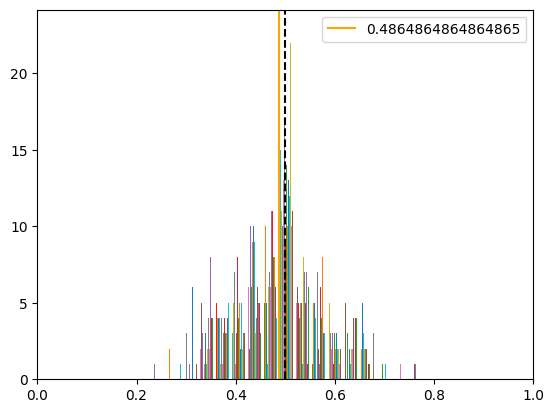

In [338]:
plt.hist(np.array(chance).T,bins=20)
plt.xlim(0,1)
plt.axvline(0.5,ls = '--', color = "black")
plt.axvline(np.median(chance),ls = '-', color = "orange", label = str(np.median(chance)))
plt.legend()

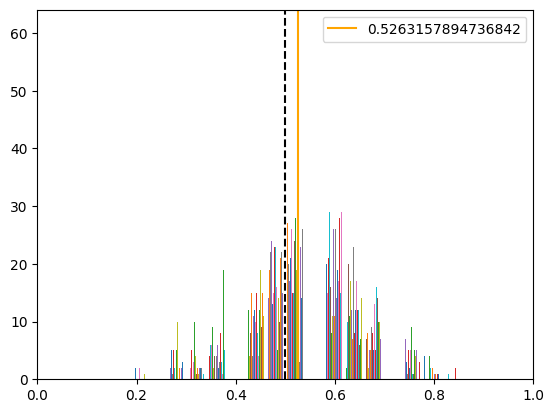

In [275]:
plt.hist(np.array(chance).T,bins=20)
plt.xlim(0,1)
plt.axvline(0.5,ls = '--', color = "black")
plt.axvline(np.median(chance),ls = '-', color = "orange", label = str(np.median(chance)))
plt.legend()

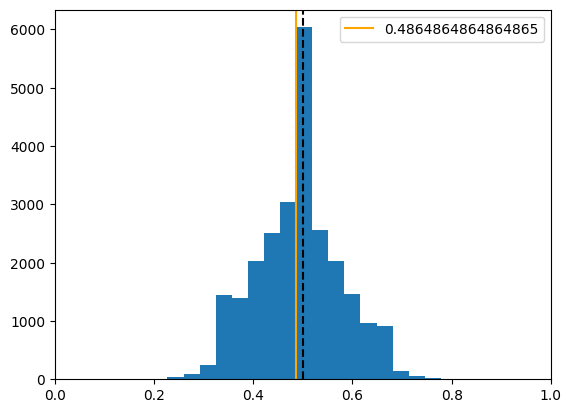

In [339]:
plt.hist(np.array(chance).flatten(),bins=20)
plt.xlim(0,1)
plt.axvline(0.5,ls = '--', color = "black")
plt.axvline(np.median(chance),ls = '-', color = "orange", label = str(np.median(chance)))
plt.legend()

In [222]:
raw_results = adaptation.classifiers.get_single_classifier_results(training, test, features_key="neuronal_features")
chance_results = [ get_single_classifier_chance(training, test, features_key="neuronal_features")['score'] for _ in range(1000)]
chance_results, raw_results['score']

([0.5454545454545454,
  0.45454545454545453,
  0.36363636363636365,
  0.6363636363636364,
  0.45454545454545453,
  0.7272727272727273,
  0.8181818181818182,
  0.45454545454545453,
  0.45454545454545453,
  0.36363636363636365,
  0.6363636363636364,
  0.6363636363636364,
  0.36363636363636365,
  0.6363636363636364,
  0.45454545454545453,
  0.8181818181818182,
  0.45454545454545453,
  0.45454545454545453,
  0.7272727272727273,
  0.45454545454545453,
  0.18181818181818182,
  0.45454545454545453,
  0.7272727272727273,
  0.6363636363636364,
  0.5454545454545454,
  0.5454545454545454,
  0.45454545454545453,
  0.6363636363636364,
  0.2727272727272727,
  0.45454545454545453,
  0.2727272727272727,
  0.6363636363636364,
  0.45454545454545453,
  0.8181818181818182,
  0.7272727272727273,
  0.8181818181818182,
  0.5454545454545454,
  0.6363636363636364,
  0.6363636363636364,
  0.6363636363636364,
  0.5454545454545454,
  0.45454545454545453,
  0.45454545454545453,
  0.7272727272727273,
  0.4545454545

In [14]:
subset = trials_roi_df.loc[0:0]

In [27]:
with pd.option_context('display.max_rows', 150, 'display.max_columns', None):
    display(subset)

F   
roi# trial#                                                      
0    0       [110.48663330078125, 131.6634063720703, 86.054...  \
     1       [67.9014892578125, 84.18050384521484, 79.32645...   
     2       [68.5937728881836, 60.977806091308594, 68.2375...   
     3       [88.68118286132812, 103.54595947265625, 58.293...   
     4       [67.2108154296875, 93.54744720458984, 47.41284...   
     5       [61.2387809753418, 62.04039001464844, 93.07856...   
     6       [100.87199401855469, 87.00389862060547, 98.347...   
     7       [104.04031372070312, 89.15300750732422, 81.111...   
     8       [81.16952514648438, 96.71385192871094, 72.9607...   
     9       [101.66789245605469, 145.193115234375, 88.2653...   
     10      [80.41024017333984, 99.21864318847656, 74.6269...   
     11      [94.21552276611328, 86.79850769042969, 85.0309...   
     12      [68.03812408447266, 89.03655242919922, 104.884...   
     13      [54.27216720581055, 64.89025115966797, 89.1744...   
     14      [73.89498901367188, 88.20506286621094, 75.3498...   
     15      [49.37717819213867, 40.45200729370117, 64.5281...   
     16      [60.29892349243164, 85.16168212890625, 72.3468...   
     17      [62.95381546020508, 57.82320022583008, 65.7714...   
     18      [57.56557083129883, 51.068687438964844, 58.784...   
     19      [42.880428314208984, 65.3575439453125, 82.6388...   
     20      [70.03380584716797, 63.43825912475586, 73.4520...   
     21      [78.99820709228516, 115.13985443115234, 55.532...   
     22      [94.26325225830078, 184.75173950195312, 104.01...   
     23      [72.58927154541016, 96.52001190185547, 56.0740...   
     24      [130.3365478515625, 119.0087890625, 77.0390396...   
     25      [89.026611328125, 87.17903900146484, 115.55131...   
     26      [76.88912200927734, 96.81219482421875, 52.2906...   
     27      [84.06704711914062, 64.12518310546875, 82.7639...   
     28      [70.43943786621094, 67.65316009521484, 91.5920...   
     29      [52.862815856933594, 81.0198974609375, 58.4936...   
     30      [109.7398910522461, 77.05498504638672, 79.3592...   
     31      [61.807518005371094, 56.86727523803711, 54.347...   
     32      [88.6243896484375, 66.70386505126953, 73.59136...   
     33      [30.058061599731445, 72.42082977294922, 99.798...   
     34      [82.01639556884766, 56.73377227783203, 84.5247...   
     35      [79.57770538330078, 64.9237060546875, 85.03238...   
     36      [58.71508026123047, 43.665916442871094, 48.893...   
     37      [71.07194519042969, 37.78615951538086, 70.8722...   
     38      [91.78521728515625, 92.76158905029297, 91.2677...   
     39      [84.99097442626953, 87.59393310546875, 79.3668...   
     40      [34.91205978393555, 50.3759880065918, 54.32717...   
     41      [30.715330123901367, 55.607913970947266, 46.54...   
     42      [64.60285186767578, 106.04995727539062, 57.325...   
     43      [55.19425582885742, 63.48979187011719, 40.7338...   
     44      [38.30034255981445, 107.37052154541016, 57.480...   
     45      [73.36776733398438, 87.6191635131836, 54.31721...   
     46      [66.25225067138672, 70.46928405761719, 81.0243...   
     47      [78.35653686523438, 90.84310913085938, 50.7485...   
     48      [50.477317810058594, 52.974334716796875, 98.83...   
     49      [78.33626556396484, 63.61309051513672, 45.4645...   
     50      [77.88352966308594, 79.556640625, 84.604385375...   
     51      [82.61448669433594, 44.03900146484375, 72.4047...   
     52      [67.33567810058594, 48.28118896484375, 71.0715...   
     53      [67.91109466552734, 96.16732025146484, 106.792...   
     54      [79.631591796875, 99.23580169677734, 67.710121...   
     55      [62.857688903808594, 69.17253112792969, 98.870...   
     56      [83.6211929321289, 89.99833679199219, 38.67985...   
     57      [48.80213928222656, 67.05059051513672, 69.4643...   
     58      [43.20699691772461, 86.48943328857422, 69.5520...   
     59      [79.47415161132812, 58

In [36]:
randomized_subset = subset.sample(frac = 1)
subset.loc[:,'target_amplitude'] = list(randomized_subset.loc[:,'target_amplitude'])

In [37]:
subset

F   
roi# trial#                                                      
0    0       [110.48663330078125, 131.6634063720703, 86.054...  \
     1       [67.9014892578125, 84.18050384521484, 79.32645...   
     2       [68.5937728881836, 60.977806091308594, 68.2375...   
     3       [88.68118286132812, 103.54595947265625, 58.293...   
     4       [67.2108154296875, 93.54744720458984, 47.41284...   
...                                                        ...   
     145     [74.84498596191406, 51.94773864746094, 107.228...   
     146     [98.53752136230469, 59.3669319152832, 81.53830...   
     147     [113.19007110595703, 66.31562805175781, 59.043...   
     148     [70.78560638427734, 42.672210693359375, 73.129...   
     149     [84.0759048461914, 123.96839904785156, 116.421...   

                                                         F_var   
roi# trial#                                                      
0    0       [0.44800236099089397, 0.7714516639019757, 0.24...  \
     1       [-0.32539554129285003, 0.023858377160785173, -...   
     2       [-0.17911552203251063, 0.18014861315202807, -0...   
     3       [-0.15754997708637508, -0.5217095653778792, -0...   
     4       [-0.2178897487180029, -0.11685176608670593, -0...   
...                                                        ...   
     145     [-0.01820918607240805, -0.015286885737646978, ...   
     146     [-0.07075263048698627, -0.14321302983827025, -...   
     147     [-0.27854251373066036, 0.2195061242315473, 0.2...   
     148     [-0.1387883226963254, -0.6539329094909159, -0....   
     149     [-0.25454560318475217, 0.3316156094474721, -0....   

                                                          Fneu   
roi# trial#                                                      
0    0       [81.11736297607422, 93.11980438232422, 73.6161...  \
     1       [52.151588439941406, 65.11491394042969, 51.899...   
     2       [57.168704986572266, 70.49388885498047, 47.332...   
     3       [57.833740234375, 44.317848205566406, 55.43520...   
     4       [55.2567253112793, 59.00489044189453, 56.47432...   
...                                                        ...   
     145     [57.141807556152344, 57.246944427490234, 57.49...   
     146     [55.0904655456543, 52.400978088378906, 51.8728...   
     147     [47.371639251708984, 65.85330200195312, 67.334...   
     148     [52.67970657348633, 33.567237854003906, 52.039...   
     149     [48.581905364990234, 70.33007049560547, 40.303...   

                                                      Fneu_var   
roi# trial#                                                      
0    0       [0.44800236099089397, 0.7714516639019757, 0.24...  \
     1       [-0.32539554129285003, 0.023858377160785173, -...   
     2       [-0.17911552203251063, 0.18014861315202807, -0...   
     3       [-0.15754997708637508, -0.5217095653778792, -0...   
     4       [-0.2178897487180029, -0.11685176608670593, -0...   
...                                                        ...   
     145     [-0.01820918607240805, -0.015286885737646978, ...   
     146     [-0.07075263048698627, -0.14321302983827025, -...   
     147     [-0.27854251373066036, 0.2195061242315473, 0.2...   
     148     [-0.1387883226963254, -0.6539329094909159, -0....   
     149     [-0.25454560318475217, 0.3316156094474721, -0....   

                                                          spks target_stim   
roi# trial#                                                                  
0    0       [0.0, 0.0, 0.0, 0.0, 2.942286491394043, 0.0, 0...    C1_10_90  \
     1       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...    D1_10_90   
     2       [0.0, 0.0, 9.140109062194824, 9.33862686157226...    C1_10_20   
     3       [0.0, 0.0, 0.0, 0.0, 0.25519195199012756, 0.0,...    D1_10_20   
     4       [0.0, 0.0, 0.0, 4.29819917678833, 0.0, 0.0, 0....    D1_10_90   
...                                                        ...         ...   
 